In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d


In [2]:
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_22/AFM_Energy_L1_19_den0.000_delta0.8_1.6_omega0.600_ramptime6.000_dt0.050_No0.csv',delimiter=',')
z0 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_22/z0_L1_19_den0.000_delta0.8_1.6_omega0.600_ramptime6.000_dt0.050_No0.csv',delimiter=',')
zz0 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_22/zz0_L1_19_den0.000_delta0.8_1.6_omega0.600_ramptime6.000_dt0.050_No0.csv',delimiter=',')

z1 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_22/z1_L1_19_den0.000_delta0.8_1.6_omega0.600_ramptime6.000_dt0.050_No0.csv',delimiter=',')
zz1 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_22/zz1_L1_19_den0.000_delta0.8_1.6_omega0.600_ramptime6.000_dt0.050_No0.csv',delimiter=',')

z2 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_22/z2_L1_19_den0.000_delta0.8_1.6_omega0.600_ramptime6.000_dt0.050_No0.csv',delimiter=',')
zz2 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_22/zz2_L1_19_den0.000_delta0.8_1.6_omega0.600_ramptime6.000_dt0.050_No0.csv',delimiter=',')

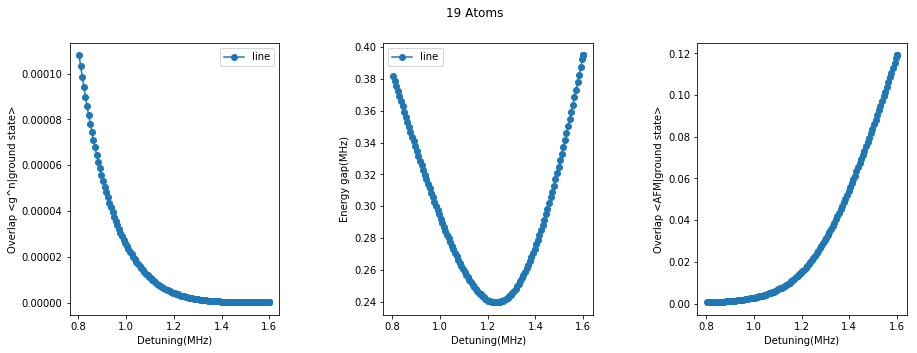

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('19 Atoms')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[2].plot(data[1],data[5],marker='o')
ax[2].set_xlabel('Detuning(MHz)')
ax[2].set_ylabel('Overlap <AFM|ground state>')
ax[1].plot(data[1], (data[3]-data[2])/2/np.pi,marker='o',label='line')
# ax[1].plot(data[1], (data[3])/2/np.pi,marker='o',label='1st')
# ax[1].plot(data[1], (data[2])/2/np.pi,marker='o',label='ground')

ax[1].set_xlabel('Detuning(MHz)')
ax[1].set_ylabel('Energy gap(MHz)')
ax[1].legend()
ax[0].plot(data[1], data[4],marker='o',label='line')
ax[0].set_xlabel('Detuning(MHz)')
ax[0].set_ylabel('Overlap <g^n|ground state>')
ax[0].legend()

In [4]:
# generate DILILA ramp
def DiLILA(t, t_len, dinit,gapinit, gapcrit, gapfin, dcrit, dfin, tinflect):
    numstep1 = gapinit* dcrit* t + gapcrit* dinit* (tinflect - t)
    denomstep1 = gapinit* t + gapcrit* (tinflect - t)
    numstep2 = gapfin* dcrit* (t_len-t) + gapcrit* dfin* (t-tinflect);
    denomstep2 = gapfin* (t_len-t) + gapcrit* (t-tinflect)
    if t>t_len:
        out = dfin
    elif t>tinflect:
        out = numstep2/ denomstep2
    else:
        out = numstep1/ denomstep1
    return out

In [5]:
# find the critical point 
gap = (data[3]-data[2])/2/np.pi
detuning = data[1]
crit_id0 = np.argmin(gap)
print(np.argmin(gap))
print(detuning[np.argmin(gap)])
print(np.min(gap))

65
1.2366666666666666
0.23945847364825149


In [6]:
z_list = [z0,z1,z2]
zz_list = [zz0,zz1,zz2]


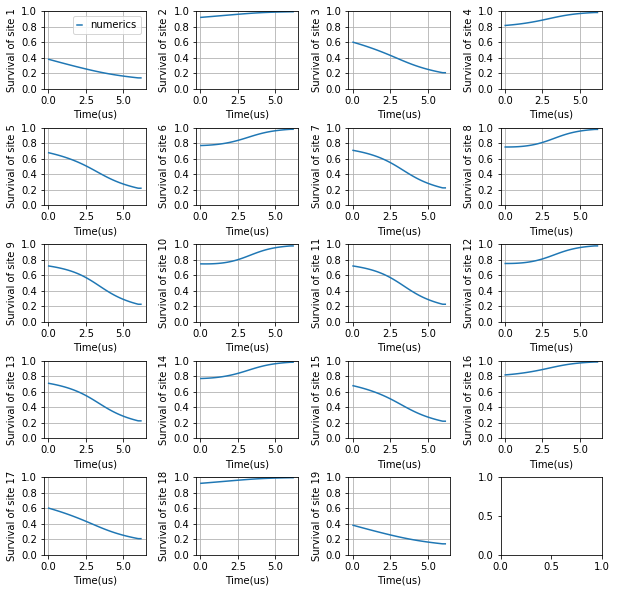

In [7]:
N = 19

fig,ax = plt.subplots(ncols = 4 ,nrows=5,figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0

for i in range(N):
    n = 1-(z0[:,i]+1)/2
    #ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data[0],n,label='numerics')
    ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
    #standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
plt.show()
#print((standard_deviation**0.5)/N)

0
0Detuning(MHz): 1.237
-0.42528319880040444
1
1Detuning(MHz): 1.237
-0.28808060641600536
2
2Detuning(MHz): 1.237
nan


C:\Users\wangy\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in log


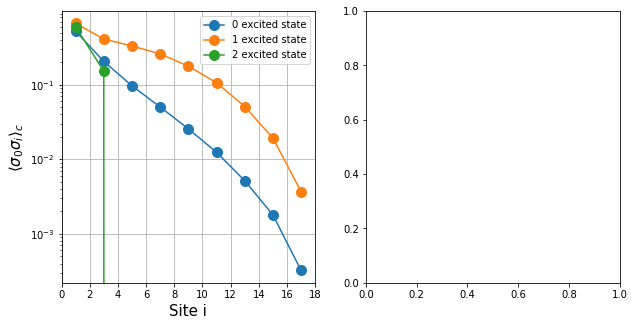

In [9]:
N = 19
center_id = int(N/2)
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(10,5))
sign = np.ones(N-1)
sign[0::2]=-1
coeff_list = []

for p in range(3):
    print(p)
    for q in np.arange(0,1,1):
        if q ==0:
            #marker = 'Crit '
            marker = str(p)
        else:
            marker = ''
        crit_id = crit_id0+q
        z = z_list[p][crit_id]
        zz = zz_list[p][crit_id].reshape(N,N)
        n = (1-z)/2
        sigma = (n[0:N-1]-n[1:N])*sign
#                 a=np.ones(N-1)
#         a[np.remainder(c_id+1,2)::2]=-1
        nn = (np.ones((N,N))-z-z[:,np.newaxis]+zz)/4
        x = np.arange(1,N)
    #sigma2 =a*(nn[c_id,0:N-1]+nn[c_id+1,1:N]-nn[c_id,1:N]-nn[c_id+1,0:N-1])
        sigma2 = []
        x2 = np.arange(0,N-2,2)
        sigma_c = []
        for i in x2:
            temp = ( (-1)**i * (nn[center_id-int(i/2),center_id+int(i/2)]\
                               +nn[center_id-int(i/2)+1,center_id+int(i/2)+1]\
                               -nn[center_id-int(i/2)+1,center_id+int(i/2)]\
                               -nn[center_id-int(i/2),center_id+int(i/2)+1]))
            sigma2.append(temp)
            sigma_c.append(temp-sigma[center_id-int(i/2)]*sigma[center_id+int(i/2)])
     
       # print(sigma_c)
        coeff = polyfit(x2+1, np.log(sigma_c), 1)
       # ax[p].plot(x2+1, np.exp(coeff[0] * (x2+1) + coeff[1]))
        print(marker+'Detuning(MHz): '+str(np.round(data[1][crit_id],3)))
        print(coeff[0])
        #ax[0].plot(x2+1,sigma_c)
        
    #    ax[0].plot(x2+1,sigma_c,label=marker+'Detuning(MHz): '+str(np.round(data[1][crit_id],3)),markersize = 10,marker = 'o')
        ax[0].plot(x2+1,sigma_c,label=marker+ ' excited state',markersize = 10,marker = 'o')
        ax[0].set_yscale('log')

        ax[0].legend()
#        # ax[p].set_title(str(p)+'th excited state')
        #ax[0].set_title('2nd Excited State')
        ax[0].grid(b=True)
        ax[0].set_xticks([0,2,4,6,8,10,12,14,16,18])
#         coeff_list.append(coeff[0])
        ax[0].set_xlabel('Site i',fontsize=15)
        ax[0].set_ylabel(r'$\langle \sigma_0\sigma_i\rangle_c$',fontsize=15)
#s = np.sin(np.pi*(x+1)/(N+2))
#print(s)



#ax.set_yscale('log')
#ax.set_xscale('log')

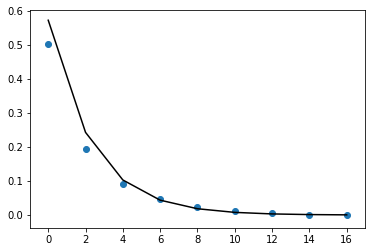

In [12]:
coeff = polyfit(x2, np.log(sigma_c), 1)
plt.plot(x2, np.exp(coeff[0] * x2 + coeff[1]), 'k-')
plt.scatter(x2,sigma_c)

0

Text(0, 0.5, 'Slope of sigma field(Ground state),N = 21')

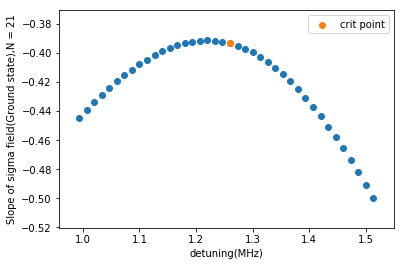

In [315]:
plt.scatter(data[1][crit_id0-20:crit_id0+20:1],coeff_list)
plt.scatter(data[1][crit_id0], -0.3933320740855661,label='crit point')
plt.legend()
plt.xlabel('detuning(MHz)')
plt.ylabel('Slope of sigma field(Ground state),N = 21')

In [285]:
slopedata = [list(data[1][crit_id0-50:crit_id0+50]),coeff_list]
np.savetxt("slopedata_19.txt",slopedata)

In [310]:
len(data[1][crit_id0-20:crit_id0+20:5])

8

In [274]:
cri

array([1])

In [264]:
len(data[1])

124

In [14]:
sigma_c

[0.5025011498077288,
 0.19336112846422127,
 0.09080797659765719,
 0.04704126776078896,
 0.023946066998879106,
 0.011550262749224272,
 0.004767976966879084,
 0.0016450076321860019,
 0.000289675252163335]

In [22]:
temp=np.array([0.45620967,  0.29702816,  0.09012046,  0.022546  , -0.00499763,
       -0.01187274, -0.00862186, -0.0028652 ,  0.00193779])

In [23]:
len(temp)

9

In [17]:
plt.plot(x)

10

In [16]:
len(x)

18

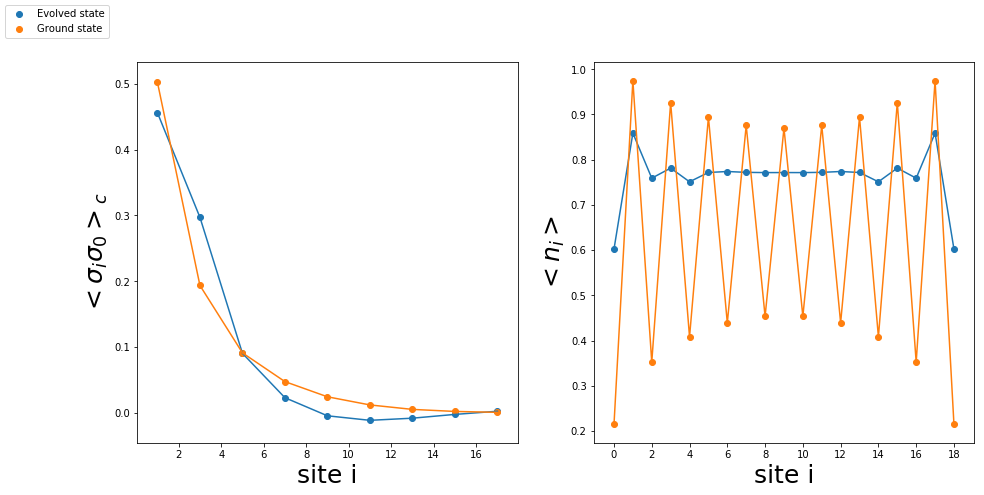

In [40]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(15,7))
ax[0].scatter(x2+1,temp,label='Evolved state')
ax[0].plot(x2+1,temp)
ax[0].scatter(x2+1,sigma_c,label = 'Ground state')
ax[0].plot(x2+1,sigma_c)
ax[1].scatter(np.arange(0,N),temp_n)
ax[1].plot(np.arange(0,N),temp_n)
ax[1].scatter(np.arange(0,N),n)
ax[1].plot(np.arange(0,N),n)

ax[0].set_xlabel('site i',fontsize = 25)
ax[0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 25)
ax[1].set_xlabel('site i',fontsize = 25)
ax[1].set_xticks(np.arange(0, N, step=2))
ax[1].set_ylabel('$<n_i>$',fontsize = 25)
fig.legend(loc='upper left')

In [27]:
temp_n=np.array([0.60215668, 0.85867681, 0.75896073, 0.78127969, 0.75098187,
       0.77156525, 0.77371759, 0.77186482, 0.77131872, 0.77139832,
       0.77131872, 0.77186482, 0.77371759, 0.77156525, 0.75098187,
       0.78127969, 0.75896073, 0.85867681, 0.60215668])

In [28]:
n

array([0.21451208, 0.9746151 , 0.35228755, 0.92596436, 0.40808644,
       0.89395286, 0.43906883, 0.87564222, 0.45335037, 0.86967637,
       0.45335038, 0.87564222, 0.43906884, 0.89395286, 0.40808644,
       0.92596437, 0.35228754, 0.9746151 , 0.21451208])